In [1]:
import numpy as np

In [27]:
N=50
L=1
L_c=50

In [35]:
def H_operator(N,inetwork,idx):
	if(inetwork ==1):
		H=np.zeros(2*N+1)
		H[N]=1
		return H,1

	elif(inetwork == 2):
		H=np.zeros([2,2*N+1])
		H[0,N-idx]=1
		H[1,N+idx]=1
		return H,2

	elif(inetwork == 3):
		H=np.zeros([N+1,2*N+1])
		for i in range(N,2*N+1):
			H[i-N,i]=1
		return H,N
	
	elif(inetwork == 4)	:
		H=np.eye(2*N+1)
		return H,2*N+1

In [28]:

def SOAR_specta(L,N,L_c):

	suma_SOAR = 1+2*np.sum([(1+(2*np.pi*n*L_c/L)**2)**(-2) for n in range(1,N+1)])
	C_0SOAR  = (2*N+1)/suma_SOAR

	d=np.zeros(2*N+1)
	for i in range(d.shape[0]):
		m=np.ceil(i/2)
		d[i]=C_0SOAR/(1+(2*np.pi*m*L_c/L)**2)**2

	C_SOAR=np.diag(d)    
	return C_SOAR

In [101]:
def compute_K(B,H):
    HBHT=np.dot(H,np.dot(B,H.T))
    Immov=HBHT+R
    K=np.dot(np.dot(B,H.T),np.squeeze(np.linalg.inv(Immov)))
    return K

In [49]:
def compute_A(K,H,B):
    A=np.dot(np.eye(2*N+1)-np.dot(K,H),B)
    return A

In [62]:
C=SOAR_specta(L,N,L_c)

In [129]:
sigma_B=0.5
sigma_o=1.0

In [130]:
cov_b=(sigma_B*np.eye(2*N+1))

In [131]:
COV_B=np.dot(cov_b,np.dot(C,cov_b.T))

In [132]:
B=sigma_B*np.eye(2*N+1)

In [133]:
(H,p)=H_operator(N,1,1)

In [134]:
H=H.T

In [135]:
R=sigma_o*np.eye(p)

In [136]:
R.shape

(1, 1)

In [137]:
K=compute_K(B,H)

In [138]:
A=compute_A(K,H,B)

In [139]:
A.shape

(101, 101)

In [140]:
import matplotlib.pyplot as plt
%matplotlib inline

In [141]:
np.diag(A).shape

(101,)

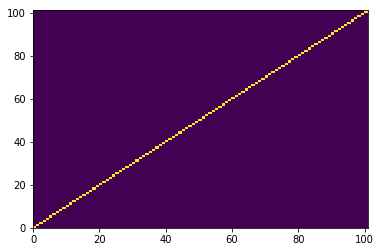

In [142]:
plt.pcolor(A)